In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('data/price_informations.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
160,1-Dec-13,697.0,1205.7,1239.9,576.0,362230.0,-0.42
161,8-Dec-13,908.9,697.0,1067.7,653.0,144170.0,0.30
162,15-Dec-13,640.5,908.9,927.9,454.9,293970.0,-0.30
163,22-Dec-13,762.0,640.5,836.8,615.0,93740.0,0.19


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX.shape

(110, 1, 5)

In [11]:
model = Sequential()  
model.add(LSTM(1, input_shape=(1, 5),return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 1)              28        
                                                                 
 dense (Dense)               (None, 1, 1)              2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
model.fit(trainX, y_train, epochs=5000, batch_size=1, verbose=1)

Epoch 1/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.7235
Epoch 2/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7474
Epoch 3/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7265
Epoch 4/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7032
Epoch 5/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.7507
Epoch 6/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.7311
Epoch 7/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7352
Epoch 8/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7799
Epoch 9/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7426
Epoch 10/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7357
Epoch 11/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.7089
Epoch 12/5000
110/110 [==============================] - 0s 4ms/step - los

110/110 [==============================] - 0s 3ms/step - loss: 36.6512
Epoch 98/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.7128
Epoch 99/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6469
Epoch 100/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.7153
Epoch 101/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6633
Epoch 102/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6325
Epoch 103/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6273
Epoch 104/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6844
Epoch 105/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6448
Epoch 106/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6495
Epoch 107/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6373
Epoch 108/5000
110/110 [==============================] - 0s 3ms/step -

110/110 [==============================] - 0s 3ms/step - loss: 36.5270
Epoch 193/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.6021
Epoch 194/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5484
Epoch 195/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5640
Epoch 196/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5746
Epoch 197/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5763
Epoch 198/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5637
Epoch 199/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5548
Epoch 200/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5443
Epoch 201/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.5329
Epoch 202/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.5323
Epoch 203/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.4809
Epoch 288/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4680
Epoch 289/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4463
Epoch 290/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4467
Epoch 291/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4680
Epoch 292/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4412
Epoch 293/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4837
Epoch 294/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4475
Epoch 295/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4568
Epoch 296/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4445
Epoch 297/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.4398
Epoch 298/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.3906
Epoch 383/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3666
Epoch 384/5000
110/110 [==============================] - 0s 4ms/step - loss: 36.3761
Epoch 385/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3891
Epoch 386/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3814
Epoch 387/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3826
Epoch 388/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3866
Epoch 389/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3686
Epoch 390/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3864
Epoch 391/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3885
Epoch 392/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.3863
Epoch 393/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.3020
Epoch 478/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2799
Epoch 479/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2872
Epoch 480/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2675
Epoch 481/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2971
Epoch 482/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2763
Epoch 483/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2912
Epoch 484/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2807
Epoch 485/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2872
Epoch 486/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2739
Epoch 487/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2704
Epoch 488/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.2175
Epoch 573/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2165
Epoch 574/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2040
Epoch 575/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1905
Epoch 576/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1844
Epoch 577/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1865
Epoch 578/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.2202
Epoch 579/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1783
Epoch 580/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1917
Epoch 581/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1934
Epoch 582/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1643
Epoch 583/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.0868
Epoch 668/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0994
Epoch 669/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0787
Epoch 670/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0678
Epoch 671/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1204
Epoch 672/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0663
Epoch 673/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0842
Epoch 674/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1143
Epoch 675/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0774
Epoch 676/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0657
Epoch 677/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.1282
Epoch 678/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 36.0055
Epoch 763/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0017
Epoch 764/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0008
Epoch 765/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9706
Epoch 766/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0075
Epoch 767/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9769
Epoch 768/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9969
Epoch 769/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9723
Epoch 770/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0116
Epoch 771/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9998
Epoch 772/5000
110/110 [==============================] - 0s 3ms/step - loss: 36.0074
Epoch 773/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 35.9055
Epoch 858/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8801
Epoch 859/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8680
Epoch 860/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8956
Epoch 861/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8934
Epoch 862/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9159
Epoch 863/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9008
Epoch 864/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8936
Epoch 865/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9156
Epoch 866/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.9025
Epoch 867/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8885
Epoch 868/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 35.8020
Epoch 953/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8402
Epoch 954/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7935
Epoch 955/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.8066
Epoch 956/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7656
Epoch 957/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7676
Epoch 958/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7946
Epoch 959/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7839
Epoch 960/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7991
Epoch 961/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7889
Epoch 962/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7804
Epoch 963/5000
110/110 [==============================] - 0s 3ms/step

110/110 [==============================] - 0s 3ms/step - loss: 35.7250
Epoch 1047/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7267
Epoch 1048/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7150
Epoch 1049/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7042
Epoch 1050/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6977
Epoch 1051/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6782
Epoch 1052/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7310
Epoch 1053/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7080
Epoch 1054/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6964
Epoch 1055/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7045
Epoch 1056/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.7245
Epoch 1057/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.5974
Epoch 1141/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6050
Epoch 1142/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5556
Epoch 1143/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6448
Epoch 1144/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5921
Epoch 1145/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6032
Epoch 1146/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5842
Epoch 1147/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6419
Epoch 1148/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6920
Epoch 1149/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5848
Epoch 1150/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.6103
Epoch 1151/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.5020
Epoch 1235/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4992
Epoch 1236/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4911
Epoch 1237/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5054
Epoch 1238/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4887
Epoch 1239/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5310
Epoch 1240/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5251
Epoch 1241/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5316
Epoch 1242/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4970
Epoch 1243/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4647
Epoch 1244/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.5489
Epoch 1245/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.4877
Epoch 1329/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4164
Epoch 1330/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4095
Epoch 1331/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3912
Epoch 1332/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3903
Epoch 1333/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4228
Epoch 1334/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3914
Epoch 1335/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4256
Epoch 1336/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3766
Epoch 1337/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.4017
Epoch 1338/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3857
Epoch 1339/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.3574
Epoch 1423/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3096
Epoch 1424/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3053
Epoch 1425/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2782
Epoch 1426/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3483
Epoch 1427/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2834
Epoch 1428/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3995
Epoch 1429/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.3595
Epoch 1430/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2997
Epoch 1431/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2924
Epoch 1432/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2568
Epoch 1433/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.2410
Epoch 1517/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2101
Epoch 1518/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2264
Epoch 1519/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2336
Epoch 1520/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2062
Epoch 1521/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2455
Epoch 1522/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2045
Epoch 1523/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1790
Epoch 1524/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2355
Epoch 1525/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.2102
Epoch 1526/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1971
Epoch 1527/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.1660
Epoch 1611/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1243
Epoch 1612/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1578
Epoch 1613/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0919
Epoch 1614/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1019
Epoch 1615/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1807
Epoch 1616/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1432
Epoch 1617/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0940
Epoch 1618/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1122
Epoch 1619/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1121
Epoch 1620/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.1512
Epoch 1621/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 35.0494
Epoch 1705/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0347
Epoch 1706/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0233
Epoch 1707/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9794
Epoch 1708/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0279
Epoch 1709/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0522
Epoch 1710/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0250
Epoch 1711/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0054
Epoch 1712/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0298
Epoch 1713/5000
110/110 [==============================] - 0s 3ms/step - loss: 35.0618
Epoch 1714/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9990
Epoch 1715/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.9045
Epoch 1799/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9517
Epoch 1800/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9460
Epoch 1801/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9767
Epoch 1802/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8907
Epoch 1803/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9050
Epoch 1804/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9370
Epoch 1805/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9677
Epoch 1806/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9563
Epoch 1807/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9121
Epoch 1808/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.9635
Epoch 1809/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.7766
Epoch 1893/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8024
Epoch 1894/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8475
Epoch 1895/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8851
Epoch 1896/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8800
Epoch 1897/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8860
Epoch 1898/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7565
Epoch 1899/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8907
Epoch 1900/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8282
Epoch 1901/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8071
Epoch 1902/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.8470
Epoch 1903/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.7547
Epoch 1987/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7284
Epoch 1988/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7267
Epoch 1989/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7163
Epoch 1990/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7267
Epoch 1991/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7355
Epoch 1992/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7094
Epoch 1993/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7375
Epoch 1994/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7137
Epoch 1995/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6904
Epoch 1996/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.7024
Epoch 1997/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.6233
Epoch 2081/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6601
Epoch 2082/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6414
Epoch 2083/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6399
Epoch 2084/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6083
Epoch 2085/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6376
Epoch 2086/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6502
Epoch 2087/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6865
Epoch 2088/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6438
Epoch 2089/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6394
Epoch 2090/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6800
Epoch 2091/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.5749
Epoch 2175/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5611
Epoch 2176/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5617
Epoch 2177/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5474
Epoch 2178/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5600
Epoch 2179/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5321
Epoch 2180/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5716
Epoch 2181/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5045
Epoch 2182/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.5337
Epoch 2183/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4893
Epoch 2184/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.6038
Epoch 2185/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.4747
Epoch 2269/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4600
Epoch 2270/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4276
Epoch 2271/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4676
Epoch 2272/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4331
Epoch 2273/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4314
Epoch 2274/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3912
Epoch 2275/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4358
Epoch 2276/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3849
Epoch 2277/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3919
Epoch 2278/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.4254
Epoch 2279/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.3579
Epoch 2363/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3429
Epoch 2364/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3666
Epoch 2365/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3347
Epoch 2366/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3111
Epoch 2367/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3313
Epoch 2368/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3392
Epoch 2369/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3746
Epoch 2370/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3194
Epoch 2371/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3667
Epoch 2372/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2935
Epoch 2373/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.2823
Epoch 2457/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2520
Epoch 2458/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2796
Epoch 2459/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2364
Epoch 2460/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2682
Epoch 2461/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2609
Epoch 2462/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2336
Epoch 2463/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2320
Epoch 2464/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2473
Epoch 2465/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2961
Epoch 2466/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.3549
Epoch 2467/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.1540
Epoch 2551/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1851
Epoch 2552/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2016
Epoch 2553/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1382
Epoch 2554/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1155
Epoch 2555/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1357
Epoch 2556/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.2031
Epoch 2557/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1472
Epoch 2558/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1394
Epoch 2559/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1678
Epoch 2560/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1513
Epoch 2561/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 34.0447
Epoch 2645/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0317
Epoch 2646/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0778
Epoch 2647/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1265
Epoch 2648/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0447
Epoch 2649/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.1001
Epoch 2650/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0825
Epoch 2651/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0140
Epoch 2652/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0499
Epoch 2653/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0809
Epoch 2654/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0584
Epoch 2655/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.9799
Epoch 2739/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9505
Epoch 2740/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9824
Epoch 2741/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9990
Epoch 2742/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9640
Epoch 2743/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9355
Epoch 2744/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9765
Epoch 2745/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9568
Epoch 2746/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9773
Epoch 2747/5000
110/110 [==============================] - 0s 3ms/step - loss: 34.0049
Epoch 2748/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9776
Epoch 2749/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.8593
Epoch 2833/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8668
Epoch 2834/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9013
Epoch 2835/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8714
Epoch 2836/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9761
Epoch 2837/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9449
Epoch 2838/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8755
Epoch 2839/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8857
Epoch 2840/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8674
Epoch 2841/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.9145
Epoch 2842/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8518
Epoch 2843/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.7808
Epoch 2927/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7607
Epoch 2928/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8363
Epoch 2929/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7753
Epoch 2930/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8069
Epoch 2931/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7877
Epoch 2932/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7635
Epoch 2933/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8066
Epoch 2934/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7970
Epoch 2935/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.8050
Epoch 2936/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7657
Epoch 2937/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.7146
Epoch 3021/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6925
Epoch 3022/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7749
Epoch 3023/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7295
Epoch 3024/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6529
Epoch 3025/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7285
Epoch 3026/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6765
Epoch 3027/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.7019
Epoch 3028/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6856
Epoch 3029/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6804
Epoch 3030/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6634
Epoch 3031/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.6309
Epoch 3115/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5848
Epoch 3116/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5965
Epoch 3117/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5848
Epoch 3118/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6071
Epoch 3119/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5659
Epoch 3120/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5879
Epoch 3121/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.6017
Epoch 3122/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5797
Epoch 3123/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5818
Epoch 3124/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5678
Epoch 3125/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.5447
Epoch 3209/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4943
Epoch 3210/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5388
Epoch 3211/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4877
Epoch 3212/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5287
Epoch 3213/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5161
Epoch 3214/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5225
Epoch 3215/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5052
Epoch 3216/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5096
Epoch 3217/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4559
Epoch 3218/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.5116
Epoch 3219/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 33.4256
Epoch 3303/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4356
Epoch 3304/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.4142
Epoch 3305/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.4093
Epoch 3306/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4277
Epoch 3307/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3382
Epoch 3308/5000
110/110 [==============================] - 0s 5ms/step - loss: 33.3581
Epoch 3309/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.4454
Epoch 3310/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.4036
Epoch 3311/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.4447
Epoch 3312/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.4015
Epoch 3313/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.3638
Epoch 3397/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3115
Epoch 3398/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3161
Epoch 3399/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3313
Epoch 3400/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3873
Epoch 3401/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3032
Epoch 3402/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3026
Epoch 3403/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3213
Epoch 3404/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.3262
Epoch 3405/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3030
Epoch 3406/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3524
Epoch 3407/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 33.1982
Epoch 3491/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.3201
Epoch 3492/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2669
Epoch 3493/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.2673
Epoch 3494/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2614
Epoch 3495/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.2334
Epoch 3496/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2352
Epoch 3497/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.2833
Epoch 3498/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.2399
Epoch 3499/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2545
Epoch 3500/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2387
Epoch 3501/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 33.1150
Epoch 3585/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.2202
Epoch 3586/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1528
Epoch 3587/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0994
Epoch 3588/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1283
Epoch 3589/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1741
Epoch 3590/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1166
Epoch 3591/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1528
Epoch 3592/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1399
Epoch 3593/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1219
Epoch 3594/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1570
Epoch 3595/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 33.0544
Epoch 3679/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1184
Epoch 3680/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0402
Epoch 3681/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0907
Epoch 3682/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0096
Epoch 3683/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.0633
Epoch 3684/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0819
Epoch 3685/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0443
Epoch 3686/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.1324
Epoch 3687/5000
110/110 [==============================] - 0s 4ms/step - loss: 33.0417
Epoch 3688/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.1484
Epoch 3689/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 33.0516
Epoch 3773/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.9488
Epoch 3774/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.9641
Epoch 3775/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.9861
Epoch 3776/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.9761
Epoch 3777/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9641
Epoch 3778/5000
110/110 [==============================] - 0s 3ms/step - loss: 33.0372
Epoch 3779/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9728
Epoch 3780/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9795
Epoch 3781/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9653
Epoch 3782/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9896
Epoch 3783/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 32.8992
Epoch 3867/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8483
Epoch 3868/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9037
Epoch 3869/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8499
Epoch 3870/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8867
Epoch 3871/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8612
Epoch 3872/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9144
Epoch 3873/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8907
Epoch 3874/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9006
Epoch 3875/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8887
Epoch 3876/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.9328
Epoch 3877/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 32.8117
Epoch 3961/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8062
Epoch 3962/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7862
Epoch 3963/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7684
Epoch 3964/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8182
Epoch 3965/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7702
Epoch 3966/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7998
Epoch 3967/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8425
Epoch 3968/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7846
Epoch 3969/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.8009
Epoch 3970/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7717
Epoch 3971/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.7068
Epoch 4055/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6908
Epoch 4056/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6640
Epoch 4057/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7372
Epoch 4058/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6626
Epoch 4059/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.7141
Epoch 4060/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6726
Epoch 4061/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.6719
Epoch 4062/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7735
Epoch 4063/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.7286
Epoch 4064/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.7391
Epoch 4065/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 32.6202
Epoch 4149/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6420
Epoch 4150/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5883
Epoch 4151/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6332
Epoch 4152/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6221
Epoch 4153/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.6405
Epoch 4154/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6520
Epoch 4155/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6025
Epoch 4156/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6437
Epoch 4157/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5364
Epoch 4158/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.6513
Epoch 4159/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 32.5624
Epoch 4243/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5637
Epoch 4244/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.5940
Epoch 4245/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5822
Epoch 4246/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5523
Epoch 4247/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.6087
Epoch 4248/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5375
Epoch 4249/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.5307
Epoch 4250/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.5529
Epoch 4251/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.5228
Epoch 4252/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5163
Epoch 4253/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.4333
Epoch 4337/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4815
Epoch 4338/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4524
Epoch 4339/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.4674
Epoch 4340/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4513
Epoch 4341/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4363
Epoch 4342/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4285
Epoch 4343/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4422
Epoch 4344/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.5147
Epoch 4345/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.5159
Epoch 4346/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4502
Epoch 4347/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.4248
Epoch 4431/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3587
Epoch 4432/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3480
Epoch 4433/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3695
Epoch 4434/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3676
Epoch 4435/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3587
Epoch 4436/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.3708
Epoch 4437/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.3884
Epoch 4438/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.3745
Epoch 4439/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3576
Epoch 4440/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.4122
Epoch 4441/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.2448
Epoch 4525/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.3001
Epoch 4526/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2733
Epoch 4527/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2463
Epoch 4528/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3013
Epoch 4529/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.3677
Epoch 4530/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2612
Epoch 4531/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2765
Epoch 4532/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2575
Epoch 4533/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2365
Epoch 4534/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2848
Epoch 4535/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.1906
Epoch 4619/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2600
Epoch 4620/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.1803
Epoch 4621/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2239
Epoch 4622/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2142
Epoch 4623/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.1838
Epoch 4624/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.1813
Epoch 4625/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.1743
Epoch 4626/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2191
Epoch 4627/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.1521
Epoch 4628/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.2012
Epoch 4629/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 32.0376
Epoch 4713/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.2238
Epoch 4714/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.2152
Epoch 4715/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.1684
Epoch 4716/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.1011
Epoch 4717/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.0966
Epoch 4718/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.0737
Epoch 4719/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.1242
Epoch 4720/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.0925
Epoch 4721/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.0762
Epoch 4722/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.1231
Epoch 4723/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 32.0281
Epoch 4807/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0771
Epoch 4808/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0461
Epoch 4809/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0152
Epoch 4810/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0713
Epoch 4811/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0474
Epoch 4812/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0672
Epoch 4813/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0260
Epoch 4814/5000
110/110 [==============================] - 0s 3ms/step - loss: 32.0337
Epoch 4815/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0652
Epoch 4816/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0820
Epoch 4817/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 4ms/step - loss: 31.9207
Epoch 4901/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9760
Epoch 4902/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9567
Epoch 4903/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9499
Epoch 4904/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9304
Epoch 4905/5000
110/110 [==============================] - 0s 4ms/step - loss: 32.0000
Epoch 4906/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9113
Epoch 4907/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9609
Epoch 4908/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9583
Epoch 4909/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9498
Epoch 4910/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.9742
Epoch 4911/5000
110/110 [==============================] - 

110/110 [==============================] - 0s 3ms/step - loss: 31.9455
Epoch 4995/5000
110/110 [==============================] - 0s 3ms/step - loss: 31.8636
Epoch 4996/5000
110/110 [==============================] - 0s 3ms/step - loss: 31.8947
Epoch 4997/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.8752
Epoch 4998/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.8850
Epoch 4999/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.8534
Epoch 5000/5000
110/110 [==============================] - 0s 4ms/step - loss: 31.8871


In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 138.63 RMSE
Test Score: 123.07 RMSE
Train Score: 31.83 MAE
Test Score: 29.00 MAE
Train Score: 0.43 MAPE
Test Score: 0.66 MAPE


In [20]:
testPredict.reshape(testPredict.shape[0])

array([ 97.613945 ,  16.370071 , 115.93697  ,   3.7650452,   9.908318 ,
        21.101585 , 237.30533  ,   2.712532 ,   9.935097 , 121.46848  ,
         2.1574097,   6.11409  ,   1.7295074,   3.5823212,   8.510452 ,
        22.0611   , 129.03041  ,  10.251076 , 177.1893   ,   1.695343 ,
         5.3019333,   0.9170761,   6.364937 ,   2.1624603,  18.877396 ,
       229.68341  ,  10.366516 ,   3.5900192, 114.20626  , 237.344    ,
        98.597725 ,   4.5673065,   8.162422 ,   5.920883 ,   1.2626572,
         9.568466 ,   6.5796204,   7.8605957,   4.999214 , 194.9718   ,
        11.771027 ,  92.868225 ,  20.720097 ,   7.71669  , 128.83887  ,
        11.766823 ,   5.4659653,   3.6682816, 184.4249   ,   5.3670197,
        10.83271  ,   1.3363419,   5.0055313,   6.1017   ,   1.257637 ],
      dtype=float32)

In [21]:
testPredict.shape

(55, 1, 1)

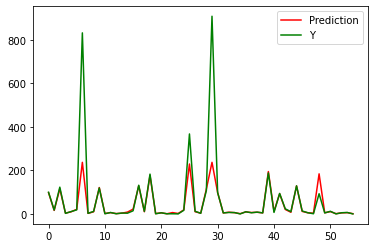

In [22]:
plt.plot(np.arange(55),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.plot(np.arange(55),y_test, c="g", label="Y")
plt.legend()
plt.show()

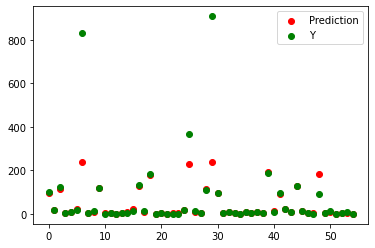

In [23]:
plt.scatter(np.arange(55),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.scatter(np.arange(55),y_test, c="g",label="Y")
plt.legend()
plt.show()

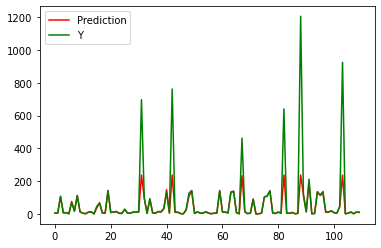

In [24]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

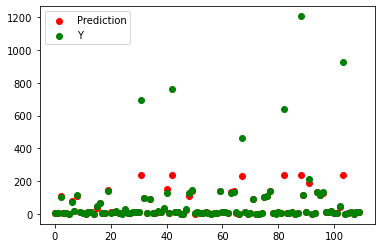

In [25]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [27]:
df = pd.read_csv('data/full_df.csv')

In [28]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [29]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [30]:
model = Sequential()  
model.add(LSTM(1, input_shape=(1, 10),return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [32]:
model.fit(trainX, y_train, epochs=5000, batch_size=1, verbose=1)

Epoch 1/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2751
Epoch 2/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2794
Epoch 3/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2702
Epoch 4/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 5/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 6/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2706
Epoch 7/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2830
Epoch 8/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 9/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 10/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 11/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2755
Epoch 12/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2753
Epoch 13/5000
75/75 [====

75/75 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 102/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2739
Epoch 103/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 104/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2765
Epoch 105/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2865
Epoch 106/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 107/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2714
Epoch 108/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2754
Epoch 109/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2737
Epoch 110/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2786
Epoch 111/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2700
Epoch 112/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 113/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2661
Epoch 200/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 201/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2708
Epoch 202/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 203/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 204/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 205/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 206/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2756
Epoch 207/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 208/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 209/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 210/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2710
Epoch 211/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2653
Epoch 298/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2685
Epoch 299/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 300/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 301/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2755
Epoch 302/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2675
Epoch 303/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 304/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 305/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2721
Epoch 306/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 307/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 308/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 309/5000
75/7

75/75 [==============================] - 0s 4ms/step - loss: 0.2688
Epoch 396/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2740
Epoch 397/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2659
Epoch 398/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2674
Epoch 399/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2679
Epoch 400/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2704
Epoch 401/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2646
Epoch 402/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2660
Epoch 403/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2651
Epoch 404/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2650
Epoch 405/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2665
Epoch 406/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2693
Epoch 407/5000
75/7

75/75 [==============================] - 0s 4ms/step - loss: 0.2665
Epoch 494/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2628
Epoch 495/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 496/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2636
Epoch 497/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2584
Epoch 498/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2724
Epoch 499/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2639
Epoch 500/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2578
Epoch 501/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2703
Epoch 502/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2635
Epoch 503/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2684
Epoch 504/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2645
Epoch 505/5000
75/7

75/75 [==============================] - 0s 4ms/step - loss: 0.2658
Epoch 592/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2617
Epoch 593/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2663
Epoch 594/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2607
Epoch 595/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2607
Epoch 596/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2632
Epoch 597/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2616
Epoch 598/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2647
Epoch 599/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 600/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2570
Epoch 601/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2572
Epoch 602/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2616
Epoch 603/5000
75/7

75/75 [==============================] - 0s 4ms/step - loss: 0.2568
Epoch 690/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2700
Epoch 691/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2630
Epoch 692/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 693/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2587
Epoch 694/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2580
Epoch 695/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2620
Epoch 696/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 697/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2586
Epoch 698/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 699/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2565
Epoch 700/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2586
Epoch 701/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 788/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2609
Epoch 789/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2606
Epoch 790/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2540
Epoch 791/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 792/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 793/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 794/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 795/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 796/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 797/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2551
Epoch 798/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2609
Epoch 799/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 886/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2551
Epoch 887/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 888/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 889/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 890/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2492
Epoch 891/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 892/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2644
Epoch 893/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 894/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 895/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2495
Epoch 896/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2532
Epoch 897/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2507
Epoch 984/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2527
Epoch 985/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2509
Epoch 986/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 987/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 988/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2586
Epoch 989/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2509
Epoch 990/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2570
Epoch 991/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2545
Epoch 992/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2601
Epoch 993/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2498
Epoch 994/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2525
Epoch 995/5000
75/7

75/75 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 1081/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 1082/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2526
Epoch 1083/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 1084/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2603
Epoch 1085/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 1086/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2531
Epoch 1087/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2503
Epoch 1088/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2499
Epoch 1089/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2484
Epoch 1090/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 1091/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2479
Epoch 10

75/75 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 1178/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 1179/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2579
Epoch 1180/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2525
Epoch 1181/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2460
Epoch 1182/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 1183/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2481
Epoch 1184/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2487
Epoch 1185/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2560
Epoch 1186/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 1187/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2482
Epoch 1188/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2515
Epoch 11

75/75 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 1275/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2480
Epoch 1276/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2475
Epoch 1277/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2520
Epoch 1278/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2457
Epoch 1279/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2558
Epoch 1280/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2384
Epoch 1281/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2561
Epoch 1282/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 1283/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2497
Epoch 1284/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2489
Epoch 1285/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2462
Epoch 12

75/75 [==============================] - 0s 3ms/step - loss: 0.2465
Epoch 1372/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2467
Epoch 1373/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2521
Epoch 1374/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2455
Epoch 1375/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 1376/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 1377/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2492
Epoch 1378/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2443
Epoch 1379/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2611
Epoch 1380/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2475
Epoch 1381/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2489
Epoch 1382/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2526
Epoch 13

75/75 [==============================] - 0s 3ms/step - loss: 0.2481
Epoch 1469/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 1470/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2461
Epoch 1471/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 1472/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2455
Epoch 1473/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2434
Epoch 1474/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2468
Epoch 1475/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2435
Epoch 1476/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2574
Epoch 1477/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 1478/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2541
Epoch 1479/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 14

75/75 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 1566/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 1567/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2579
Epoch 1568/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2439
Epoch 1569/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2394
Epoch 1570/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2461
Epoch 1571/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 1572/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2485
Epoch 1573/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2421
Epoch 1574/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2431
Epoch 1575/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2456
Epoch 1576/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 15

75/75 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 1663/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2430
Epoch 1664/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2461
Epoch 1665/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 1666/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2430
Epoch 1667/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2506
Epoch 1668/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2457
Epoch 1669/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2432
Epoch 1670/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 1671/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2423
Epoch 1672/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2430
Epoch 1673/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2382
Epoch 16

75/75 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 1760/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2544
Epoch 1761/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 1762/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2434
Epoch 1763/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2566
Epoch 1764/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 1765/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2485
Epoch 1766/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2440
Epoch 1767/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 1768/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2426
Epoch 1769/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 1770/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2487
Epoch 17

75/75 [==============================] - 0s 3ms/step - loss: 0.2445
Epoch 1857/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2405
Epoch 1858/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2391
Epoch 1859/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2397
Epoch 1860/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2468
Epoch 1861/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2441
Epoch 1862/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2388
Epoch 1863/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2545
Epoch 1864/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2400
Epoch 1865/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2462
Epoch 1866/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2382
Epoch 1867/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2429
Epoch 18

75/75 [==============================] - 0s 4ms/step - loss: 0.2443
Epoch 1954/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 1955/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2381
Epoch 1956/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2473
Epoch 1957/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2419
Epoch 1958/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2439
Epoch 1959/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2478
Epoch 1960/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2385
Epoch 1961/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2434
Epoch 1962/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 1963/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2466
Epoch 1964/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2439
Epoch 19

75/75 [==============================] - 0s 3ms/step - loss: 0.2482
Epoch 2051/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2484
Epoch 2052/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2347
Epoch 2053/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2368
Epoch 2054/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2404
Epoch 2055/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2494
Epoch 2056/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2369
Epoch 2057/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2419
Epoch 2058/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2367
Epoch 2059/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2428
Epoch 2060/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2386
Epoch 2061/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2442
Epoch 20

75/75 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2148/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2349
Epoch 2149/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2361
Epoch 2150/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2406
Epoch 2151/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 2152/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2405
Epoch 2153/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2370
Epoch 2154/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2356
Epoch 2155/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2398
Epoch 2156/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2405
Epoch 2157/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 2158/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2407
Epoch 21

75/75 [==============================] - 0s 4ms/step - loss: 0.2366
Epoch 2245/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 2246/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2413
Epoch 2247/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 2248/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2385
Epoch 2249/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2401
Epoch 2250/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2326
Epoch 2251/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 2252/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2421
Epoch 2253/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 2254/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 2255/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2350
Epoch 22

75/75 [==============================] - 0s 4ms/step - loss: 0.2306
Epoch 2342/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2378
Epoch 2343/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2348
Epoch 2344/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2416
Epoch 2345/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 2346/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2392
Epoch 2347/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2409
Epoch 2348/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 2349/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2348
Epoch 2350/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2341
Epoch 2351/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2349
Epoch 2352/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2353
Epoch 23

75/75 [==============================] - 0s 3ms/step - loss: 0.2314
Epoch 2439/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2334
Epoch 2440/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2362
Epoch 2441/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2360
Epoch 2442/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 2443/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2337
Epoch 2444/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2365
Epoch 2445/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 2446/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2436
Epoch 2447/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2315
Epoch 2448/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2455
Epoch 2449/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2373
Epoch 24

75/75 [==============================] - 0s 3ms/step - loss: 0.2340
Epoch 2536/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 2537/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2323
Epoch 2538/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2336
Epoch 2539/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 2540/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2345
Epoch 2541/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2391
Epoch 2542/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 2543/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 2544/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2357
Epoch 2545/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2356
Epoch 2546/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2330
Epoch 25

75/75 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 2633/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2328
Epoch 2634/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2363
Epoch 2635/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 2636/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2301
Epoch 2637/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2324
Epoch 2638/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2370
Epoch 2639/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2289
Epoch 2640/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2388
Epoch 2641/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2436
Epoch 2642/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2421
Epoch 2643/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2321
Epoch 26

75/75 [==============================] - 0s 4ms/step - loss: 0.2313
Epoch 2730/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 2731/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2338
Epoch 2732/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2342
Epoch 2733/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2338
Epoch 2734/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2343
Epoch 2735/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2404
Epoch 2736/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2278
Epoch 2737/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2330
Epoch 2738/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2335
Epoch 2739/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 2740/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2360
Epoch 27

75/75 [==============================] - 0s 4ms/step - loss: 0.2324
Epoch 2827/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2350
Epoch 2828/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2407
Epoch 2829/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 2830/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2831/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2286
Epoch 2832/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2331
Epoch 2833/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2314
Epoch 2834/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2312
Epoch 2835/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 2836/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2353
Epoch 2837/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2334
Epoch 28

75/75 [==============================] - 0s 4ms/step - loss: 0.2281
Epoch 2924/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2335
Epoch 2925/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2244
Epoch 2926/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2370
Epoch 2927/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2263
Epoch 2928/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2252
Epoch 2929/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2480
Epoch 2930/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2453
Epoch 2931/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 2932/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2333
Epoch 2933/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 2934/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2365
Epoch 29

75/75 [==============================] - 0s 4ms/step - loss: 0.2246
Epoch 3021/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2308
Epoch 3022/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2321
Epoch 3023/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2350
Epoch 3024/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 3025/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 3026/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2288
Epoch 3027/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2309
Epoch 3028/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2287
Epoch 3029/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 3030/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2281
Epoch 3031/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2277
Epoch 30

75/75 [==============================] - 0s 4ms/step - loss: 0.2327
Epoch 3118/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2250
Epoch 3119/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2232
Epoch 3120/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2265
Epoch 3121/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2303
Epoch 3122/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2346
Epoch 3123/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2335
Epoch 3124/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2305
Epoch 3125/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2325
Epoch 3126/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2242
Epoch 3127/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2246
Epoch 3128/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 31

75/75 [==============================] - 0s 4ms/step - loss: 0.2330
Epoch 3215/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2278
Epoch 3216/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2279
Epoch 3217/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2326
Epoch 3218/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3219/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2280
Epoch 3220/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2251
Epoch 3221/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2279
Epoch 3222/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2314
Epoch 3223/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2310
Epoch 3224/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2293
Epoch 3225/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2238
Epoch 32

75/75 [==============================] - 0s 3ms/step - loss: 0.2254
Epoch 3312/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2303
Epoch 3313/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2269
Epoch 3314/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2267
Epoch 3315/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2297
Epoch 3316/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2279
Epoch 3317/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2250
Epoch 3318/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2250
Epoch 3319/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2269
Epoch 3320/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2271
Epoch 3321/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2266
Epoch 3322/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2289
Epoch 33

75/75 [==============================] - 0s 3ms/step - loss: 0.2258
Epoch 3409/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2295
Epoch 3410/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2303
Epoch 3411/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2324
Epoch 3412/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2337
Epoch 3413/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2231
Epoch 3414/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2271
Epoch 3415/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2284
Epoch 3416/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3417/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2254
Epoch 3418/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2298
Epoch 3419/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2303
Epoch 34

75/75 [==============================] - 0s 3ms/step - loss: 0.2258
Epoch 3506/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 3507/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2314
Epoch 3508/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2295
Epoch 3509/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3510/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 3511/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3512/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2264
Epoch 3513/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2245
Epoch 3514/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2262
Epoch 3515/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2277
Epoch 3516/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2267
Epoch 35

75/75 [==============================] - 0s 4ms/step - loss: 0.2291
Epoch 3603/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2279
Epoch 3604/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2361
Epoch 3605/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2229
Epoch 3606/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2226
Epoch 3607/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2257
Epoch 3608/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2193
Epoch 3609/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2191
Epoch 3610/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2240
Epoch 3611/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2261
Epoch 3612/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2269
Epoch 3613/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2317
Epoch 36

75/75 [==============================] - 0s 3ms/step - loss: 0.2289
Epoch 3700/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2249
Epoch 3701/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2225
Epoch 3702/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2150
Epoch 3703/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2260
Epoch 3704/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3705/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2252
Epoch 3706/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2261
Epoch 3707/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2217
Epoch 3708/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2280
Epoch 3709/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 3710/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2253
Epoch 37

75/75 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3797/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 3798/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2219
Epoch 3799/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2355
Epoch 3800/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2281
Epoch 3801/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2180
Epoch 3802/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2267
Epoch 3803/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 3804/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 3805/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2272
Epoch 3806/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 3807/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2263
Epoch 38

75/75 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3894/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2309
Epoch 3895/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2216
Epoch 3896/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2186
Epoch 3897/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2267
Epoch 3898/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2249
Epoch 3899/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2256
Epoch 3900/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 3901/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2335
Epoch 3902/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2234
Epoch 3903/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2189
Epoch 3904/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2171
Epoch 39

75/75 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 3991/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 3992/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2277
Epoch 3993/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2232
Epoch 3994/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2182
Epoch 3995/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2227
Epoch 3996/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 3997/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2263
Epoch 3998/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2248
Epoch 3999/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2143
Epoch 4000/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2203
Epoch 4001/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2258
Epoch 40

75/75 [==============================] - 0s 3ms/step - loss: 0.2232
Epoch 4088/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2183
Epoch 4089/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2196
Epoch 4090/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2274
Epoch 4091/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2168
Epoch 4092/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2207
Epoch 4093/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 4094/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2216
Epoch 4095/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2201
Epoch 4096/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2211
Epoch 4097/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2171
Epoch 4098/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 40

75/75 [==============================] - 0s 3ms/step - loss: 0.2250
Epoch 4185/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2170
Epoch 4186/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2262
Epoch 4187/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2226
Epoch 4188/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2206
Epoch 4189/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2145
Epoch 4190/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2157
Epoch 4191/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2190
Epoch 4192/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 4193/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 4194/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2179
Epoch 4195/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2220
Epoch 41

75/75 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 4282/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2174
Epoch 4283/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 4284/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 4285/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2216
Epoch 4286/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2253
Epoch 4287/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2190
Epoch 4288/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 4289/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2200
Epoch 4290/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2165
Epoch 4291/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2152
Epoch 4292/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 42

75/75 [==============================] - 0s 4ms/step - loss: 0.2211
Epoch 4379/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2310
Epoch 4380/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 4381/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2247
Epoch 4382/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2189
Epoch 4383/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2220
Epoch 4384/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2207
Epoch 4385/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2301
Epoch 4386/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2262
Epoch 4387/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2210
Epoch 4388/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 4389/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2158
Epoch 43

75/75 [==============================] - 0s 3ms/step - loss: 0.2150
Epoch 4476/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 4477/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2122
Epoch 4478/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 4479/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 4480/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 4481/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2122
Epoch 4482/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2178
Epoch 4483/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2192
Epoch 4484/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2197
Epoch 4485/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2254
Epoch 4486/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2178
Epoch 44

75/75 [==============================] - 0s 3ms/step - loss: 0.2190
Epoch 4573/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 4574/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2179
Epoch 4575/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2134
Epoch 4576/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2114
Epoch 4577/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2173
Epoch 4578/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2175
Epoch 4579/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2142
Epoch 4580/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2173
Epoch 4581/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2219
Epoch 4582/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2150
Epoch 4583/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 45

75/75 [==============================] - 0s 4ms/step - loss: 0.2132
Epoch 4670/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2109
Epoch 4671/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2212
Epoch 4672/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2163
Epoch 4673/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2146
Epoch 4674/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2120
Epoch 4675/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2190
Epoch 4676/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2134
Epoch 4677/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 4678/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2148
Epoch 4679/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 4680/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2227
Epoch 46

75/75 [==============================] - 0s 4ms/step - loss: 0.2103
Epoch 4767/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2153
Epoch 4768/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 4769/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2181
Epoch 4770/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2210
Epoch 4771/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2184
Epoch 4772/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2134
Epoch 4773/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 4774/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2161
Epoch 4775/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2143
Epoch 4776/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2154
Epoch 4777/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 47

75/75 [==============================] - 0s 4ms/step - loss: 0.2195
Epoch 4864/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2205
Epoch 4865/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2129
Epoch 4866/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2118
Epoch 4867/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2109
Epoch 4868/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2148
Epoch 4869/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2148
Epoch 4870/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2218
Epoch 4871/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2141
Epoch 4872/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2159
Epoch 4873/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 4874/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2114
Epoch 48

75/75 [==============================] - 0s 3ms/step - loss: 0.2147
Epoch 4961/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 4962/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2110
Epoch 4963/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2195
Epoch 4964/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2113
Epoch 4965/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2175
Epoch 4966/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2165
Epoch 4967/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2145
Epoch 4968/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2171
Epoch 4969/5000
75/75 [==============================] - 0s 4ms/step - loss: 0.2168
Epoch 4970/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2117
Epoch 4971/5000
75/75 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 49

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test.values, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.39 RMSE
Test Score: 0.68 RMSE
Train Score: 0.21 MAE
Test Score: 0.45 MAE
Train Score: 0.07 MAPE
Test Score: 0.22 MAPE


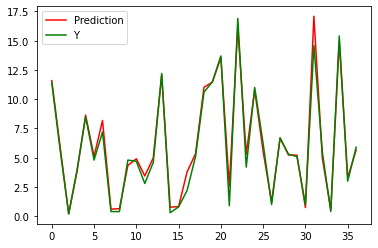

In [34]:
plt.plot(np.arange(testPredict.shape[0]),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

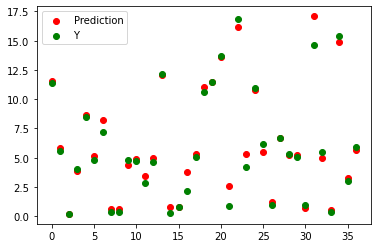

In [35]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

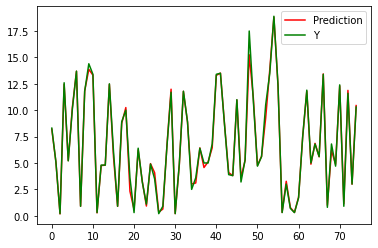

In [36]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

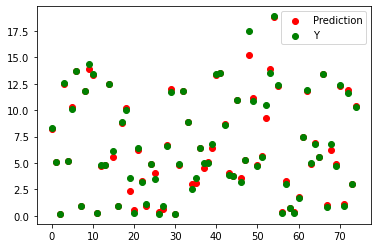

In [37]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()